In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5

In [10]:
# from the zillow set that we did 
def get_lower_and_upper_bounds(x, k = 1.5):
 
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower_bound = round(q1 - (k * iqr), 3)
    upper_bound = round(q3 + (k * iqr), 3)
    
    return lower_bound, upper_bound

Using lemonade.csv dataset and focusing on continuous variables:

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [8]:
lemon_df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

lemon_df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
lemon_df.dtypes

Date            object
Day             object
Temperature    float64
Rainfall       float64
Flyers           int64
Price          float64
Sales            int64
dtype: object

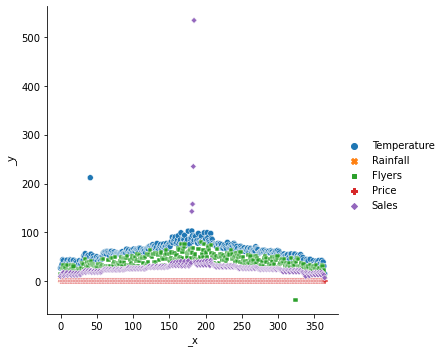

In [12]:
sns.relplot(data=lemon_df)

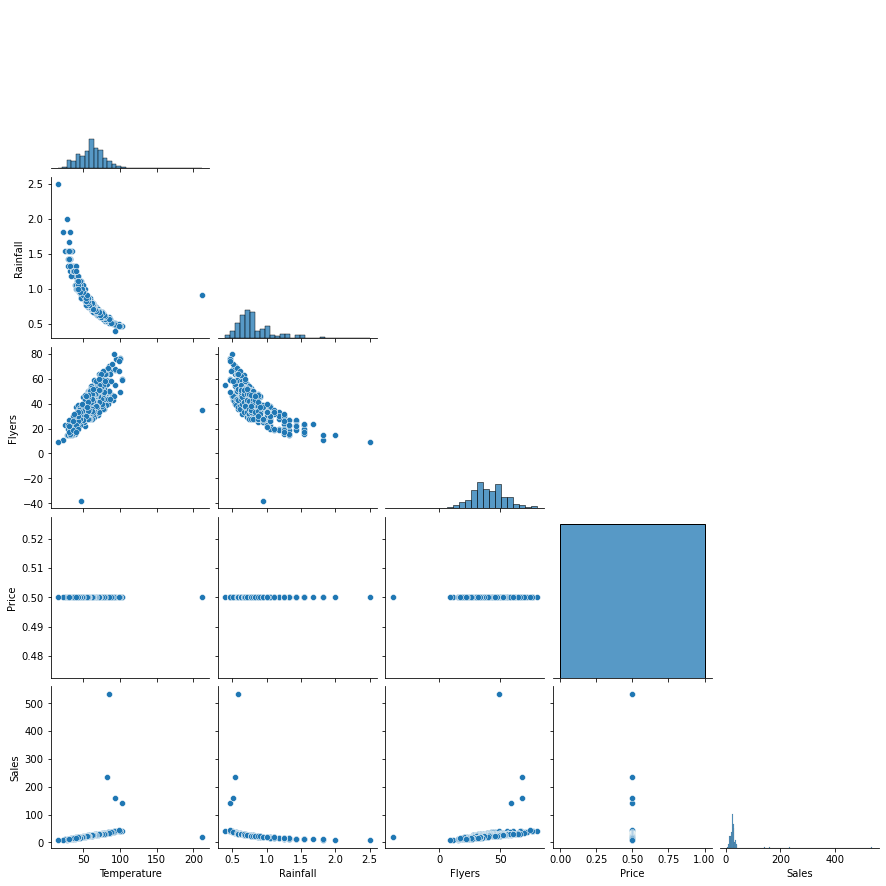

In [14]:
sns.pairplot(data=lemon_df, corner= True)

Date


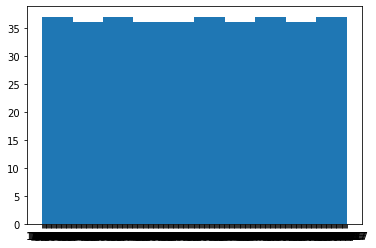

Day


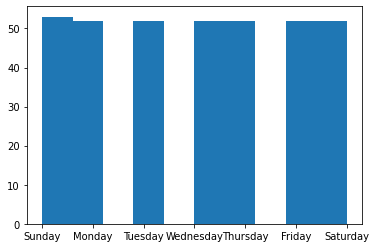

Temperature


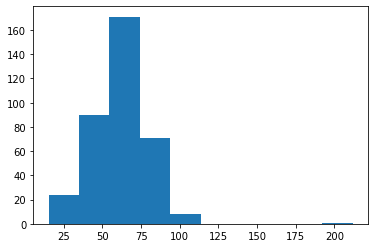

Rainfall


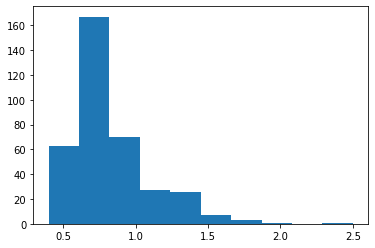

Flyers


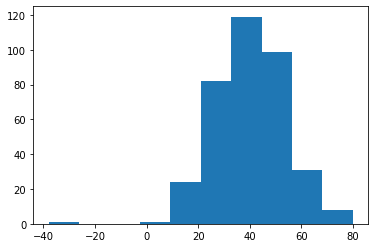

Price


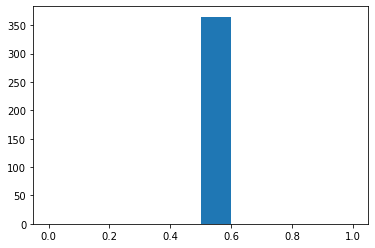

Sales


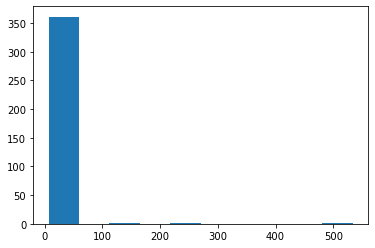

In [18]:
for col in lemon_df.columns:
    print(col)
    plt.hist(lemon_df[col])
    plt.show()

In [19]:
lemon_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
Rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
Flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
Price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
Sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


In [23]:
def get_outliers_15(df, k = 1.5):
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            print ([col])
            lower, upper = get_lower_and_upper_bounds(df[col], k = k)
            print(lower, upper)

In [24]:
get_outliers_15(lemon_df)

['Temperature']
16.7 104.7
['Rainfall']
0.26 1.3
['Flyers']
4.0 76.0
['Price']
0.5 0.5
['Sales']
5.0 45.0


Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [25]:
def get_outliers_3(df, k=3):
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            print ([col])
            lower, upper = get_lower_and_upper_bounds(df[col], k =3)
            print(lower, upper)

In [26]:
get_outliers_3(lemon_df)

['Temperature']
-16.3 137.7
['Rainfall']
-0.13 1.69
['Flyers']
-23.0 103.0
['Price']
0.5 0.5
['Sales']
-10.0 60.0


Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

Use a 2 sigma decision rule to isolate the outliers.

Do these make sense?
Should certain outliers be kept or removed?

In [28]:
z_scores = {}
cols = ['Temperature', 'Rainfall', 'Flyers']
for col in cols:
    lemon_df['z_score_'+ col] = (lemon_df[col] - lemon_df[col].mean()) / lemon_df[col].std()
    print(col)
    print(lemon_df[lemon_df['z_score_' + col].abs() > 2])
    print('-------\n')

Temperature
         Date       Day  Temperature  Rainfall  Flyers  Price  Sales  \
41    2/11/17  Saturday        212.0      0.91      35    0.5     21   
166   6/16/17    Friday         99.3      0.47      77    0.5     41   
176   6/26/17    Monday        102.6      0.47      60    0.5     42   
181    7/1/17  Saturday        102.9      0.47      59    0.5    143   
190   7/10/17    Monday         98.0      0.49      66    0.5     40   
198   7/18/17   Tuesday         99.3      0.47      76    0.5     41   
202   7/22/17  Saturday         99.6      0.47      49    0.5     42   
207   7/27/17  Thursday         97.9      0.47      74    0.5     43   
338   12/5/17   Tuesday         22.0      1.82      11    0.5     10   
364  12/31/17    Sunday         15.1      2.50       9    0.5      7   

     z_score_Temperature  
41              8.336627  
166             2.105251  
176             2.287714  
181             2.304301  
190             2.033372  
198             2.105251  
202   

In [29]:
z_scores = {}
cols = ['Temperature', 'Rainfall', 'Flyers']
for col in cols:
    lemon_df['z_score_'+ col] = (lemon_df[col] - lemon_df[col].mean()) / lemon_df[col].std()
    print(col)
    print(lemon_df[lemon_df['z_score_' + col].abs() > 3])
    print('-------\n')

Temperature
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales  \
41  2/11/17  Saturday        212.0      0.91      35    0.5     21   

    z_score_Temperature  z_score_Rainfall  z_score_Flyers  
41             8.336627          0.306792       -0.370227  
-------

Rainfall
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales  \
0      1/1/17   Sunday         27.0      2.00      15    0.5     10   
15    1/16/17   Monday         30.6      1.67      24    0.5     12   
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10   
343  12/10/17   Sunday         31.3      1.82      15    0.5     11   
364  12/31/17   Sunday         15.1      2.50       9    0.5      7   

     z_score_Temperature  z_score_Rainfall  z_score_Flyers  
0              -1.892340          4.286488       -1.820927  
15             -1.693290          3.081626       -1.168112  
338            -2.168799          3.629291       -2.111067  
343            -1.654586          3.62